In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate


from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

import numpy as np
from math import pi

In [15]:
def grover_d():
    qc = QuantumCircuit(3)
    #Diffusor
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(0)
    qc.ccx(1,2,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1,2])
    qc.h([0,1,2])
    #Corrrect the sign, in this contex required...
    qc.rz(2*pi,0)
    qc.rz(2*pi,1)
    qc.rz(2*pi,2)

    qc.name="G"
    return qc

In [16]:
def grover_p():
    qc = QuantumCircuit(4)
    #Diffusor
    qc.h([0,2,3])
    qc.x([0,2,3])
    qc.h(0)
    qc.ccx(2,3,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,2,3])
    qc.h([0,2,3])
    #Corrrect the sign, in this contex required...
    qc.rz(2*pi,0)
    qc.rz(2*pi,2)
    qc.rz(2*pi,2)

    qc.name="G"
    return qc

In [17]:
def oracle1_d():
    qc = QuantumCircuit(4)
    qc.x(2)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(2)
    qc.name="h1"
    return qc

In [18]:
def oracle2_d():
    qc = QuantumCircuit(4)
    qc.x(1)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(1)
    qc.name="h2"
    return qc

In [19]:
def anti_oracle2_d():
    qc = QuantumCircuit(4)
    qc.x(1)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
   
    qc.name="AO2"
    return qc

In [20]:
def anti_oracle1_d():
    qc = QuantumCircuit(4)
    qc.x(2)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])

    qc.name="AO1"
    return qc

In [21]:
def oracle1_u():
    qc = QuantumCircuit(5)
    qc.x(0)
    qc.x(2)
    qc.x(3)
    gate = MCXGate(4)
    qc.append(gate, [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(2)
    qc.x(3)
    qc.name="O1"
    return qc

In [22]:
def oracle1():
    qc = QuantumCircuit(8)
    qc.x(2)
    qc.x(5)
    qc.x(6)
    gate = MCXGate(6)
    qc.append(gate, [0, 1, 2, 4, 5, 6, 7])
    qc.x(2)
    qc.x(5)
    qc.x(6)
    qc.name="O1"
    return qc

In [23]:
def oracle2():
    qc = QuantumCircuit(8)
    qc.x(1)
    qc.x(5)
    qc.x(6)
    gate = MCXGate(6)
    qc.append(gate, [0, 1, 2, 4, 5, 6, 7])
    qc.x(1)
    qc.x(5)
    qc.x(6)
    qc.name="O2"
    return qc

In [24]:
def oracle1_p():
    qc = QuantumCircuit(7)
    qc.x(2)

    qc.x(5)
    gate = MCXGate(5)
    qc.append(gate, [0, 1, 2, 4, 5, 6])
    qc.x(2)
    
    qc.x(5)
    qc.name="O"
    return qc

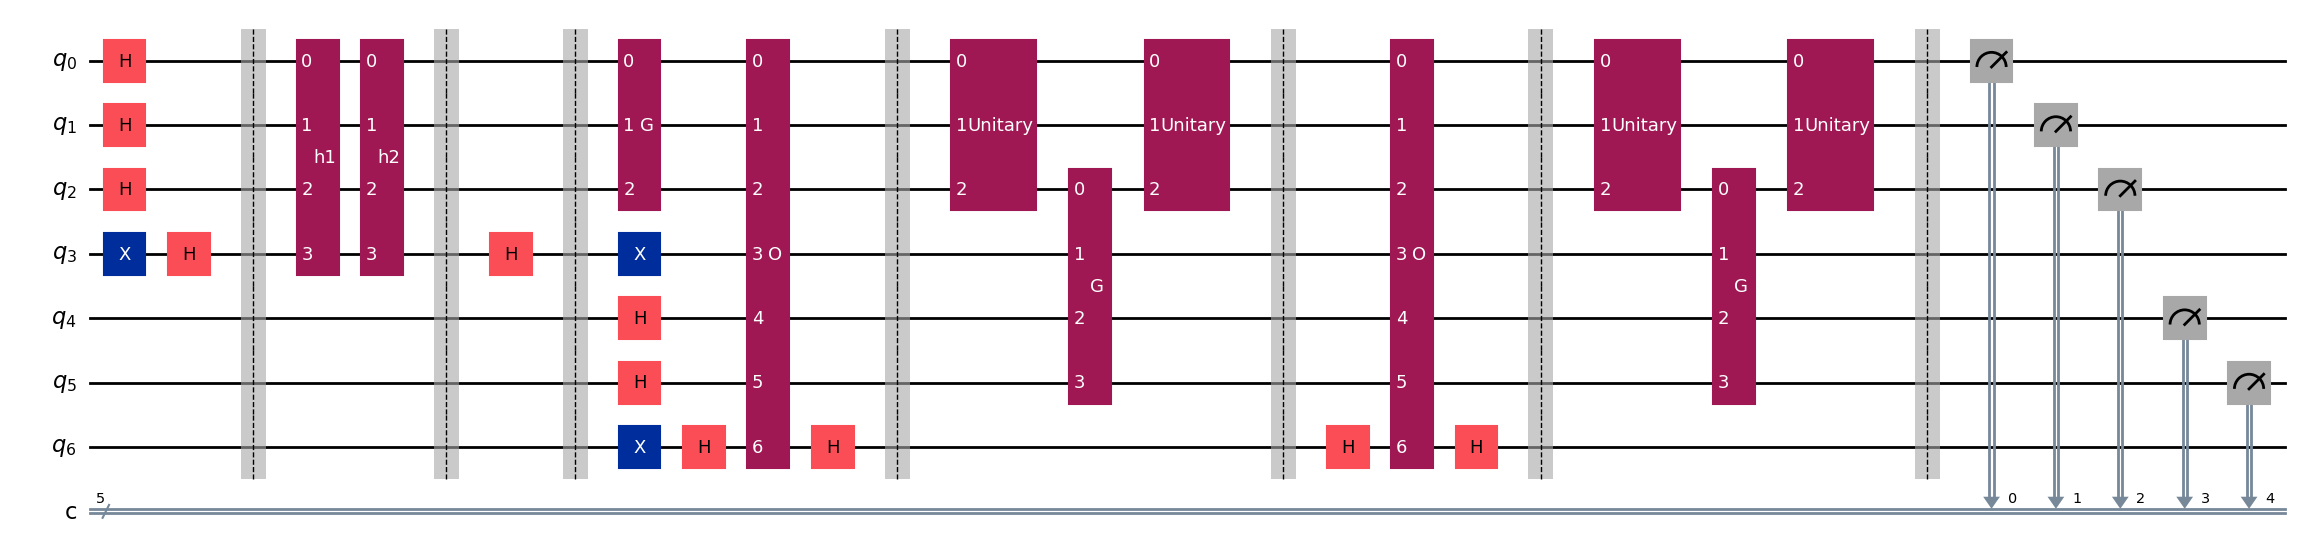

In [25]:
from qiskit.circuit.library import UnitaryGate

qc = QuantumCircuit(7,5)
#Preparation
qc.h([0,1,2])

#Preparation of Aux
qc.x(3)
qc.h(3)

P =[[0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0,
   0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 
  0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 
  1]]

PermutationGate = UnitaryGate(P)

qc.barrier()
qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))


qc.barrier()
qc.h(3)

qc.barrier()
qc.x(3)
qc.append(grover_d(),range(3))



#Preparation
qc.h([4,5])

qc.x(6)
qc.h(6)

qc.append(oracle1_p(),range(7))
qc.h(6)
qc.barrier()

qc.append(PermutationGate, [0, 1, 2])
qc.append(grover_p(),[2, 3, 4, 5])
qc.append(PermutationGate, [0, 1, 2]).inverse()

qc.barrier()
qc.h(6)

qc.append(oracle1_p(),range(7))
qc.h(6)

qc.barrier()

qc.append(PermutationGate, [0, 1, 2])
qc.append(grover_p(),[2, 3, 4, 5])
qc.append(PermutationGate, [0, 1, 2]).inverse()

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(4,3)
qc.measure(5,4)



qc.draw('mpl',fold=220)


Total count are: {'01101': 72, '00011': 86, '10101': 81, '00101': 83, '11011': 82, '10011': 79, '11101': 84, '01011': 9433}


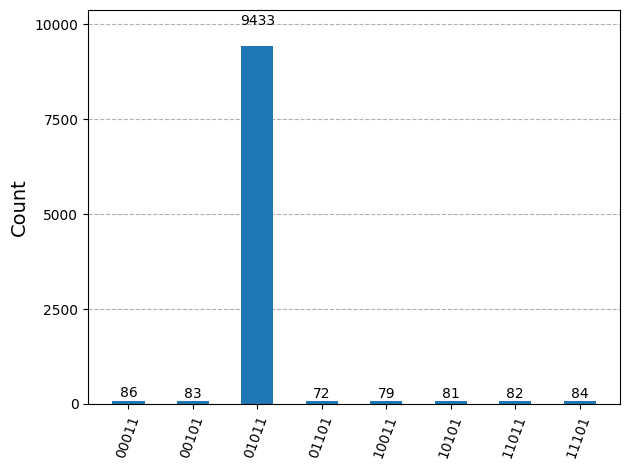

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)